In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression as LR  # 线性回归
from sklearn.model_selection import train_test_split  # 划分训练测试集
from sklearn.cluster import KMeans


In [58]:
# 所有表格的结构
# 1. 读取数据
# acs_5yr = pd.read_csv('./acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
# all_comm = pd.read_csv('./all_commodities.csv')
# all_stock = pd.read_csv('./all_stock_and_etfs.csv')
# storage = pd.read_csv('./Meat_Stats_Cold_Storage.csv')
# production = pd.read_csv('./Meat_Stats_Meat_Production.csv')
# counts = pd.read_csv('./Meat_Stats_Slaughter_Counts.csv')
# Meat_weights = pd.read_csv('./Meat_Stats_Slaughter_Weights.csv')
# nutrition = pd.read_csv('./Nutrition_Physical_Activity_and_Obesity_Data.csv')
# stock_des = pd.read_csv('./stock_descriptions.csv')
# tables = [acs_5yr, all_comm, all_stock, storage, production, counts, weights, nutrition, stock_des]
# acs_5yr['Label (Grouping)']

In [59]:
data = pd.read_csv("./income_obesity.csv")

In [60]:
data

,Year,Data_Value,Income,StratificationCategoryId1,StratificationID1,Mean household income (dollars),Median household income (dollars),LocationDesc
0,2011,29.3,NaN,AGEYR,AGEYR65PLUS,"84,767","69,014",Alaska
1,2011,22.7,Data not reported,INC,INCNR,"84,767","69,014",Alaska
2,2011,19.8,NaN,AGEYR,AGEYR1824,"84,767","69,014",Alaska
3,2011,22.1,NaN,EDU,EDUCOGRAD,"84,767","69,014",Alaska
4,2011,29.5,NaN,AGEYR,AGEYR3544,"84,767","69,014",Alaska
...,...,...,...,...,...,...,...,...
15831,2022,35.7,NaN,EDU,EDUHSGRAD,NaN,NaN,National
15832,2022,33.7,NaN,RACE,RACE2PLUS,NaN,NaN,National
15833,2022,29.5,Data not reported,INC,INCNR,NaN,NaN,National
15834,2022,38.4,"$15,000 - $24,999",INC,INC1525,NaN,NaN,National


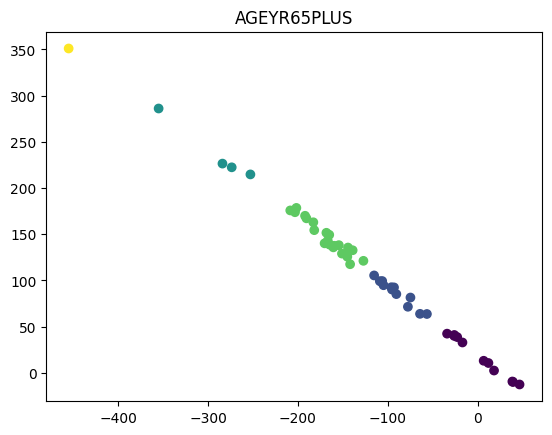

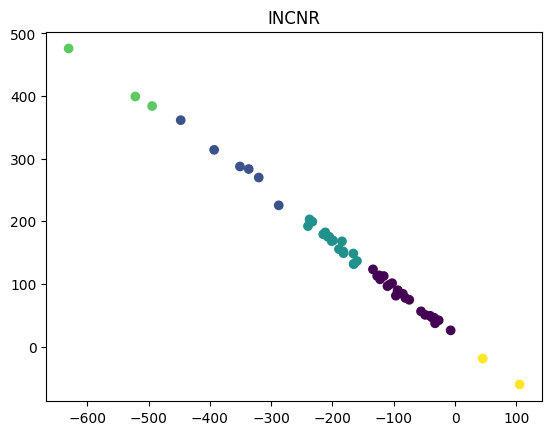

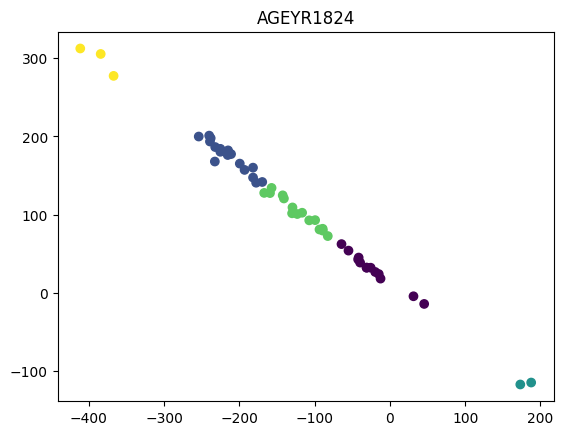

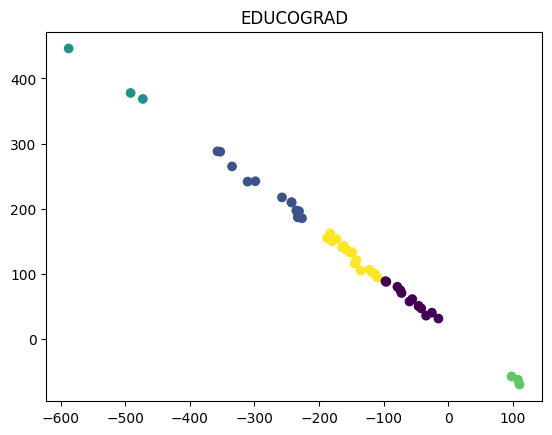

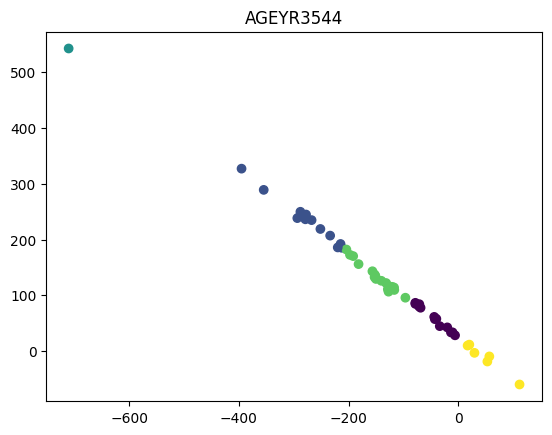

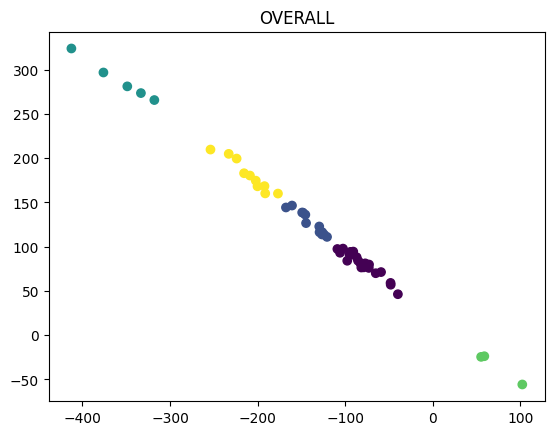

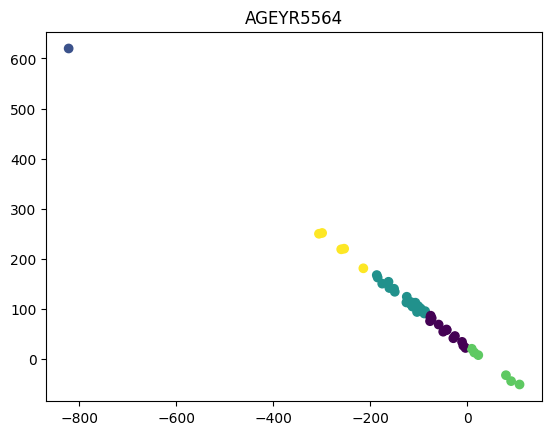

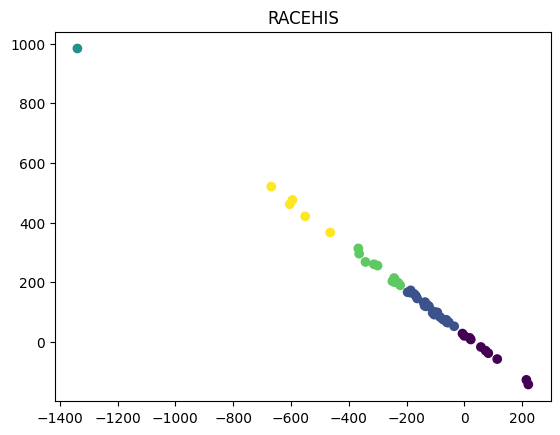

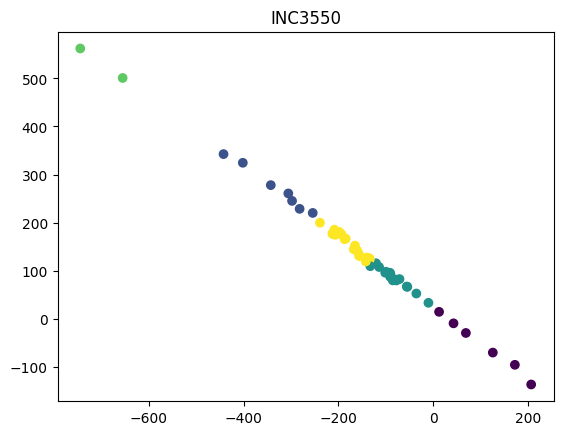

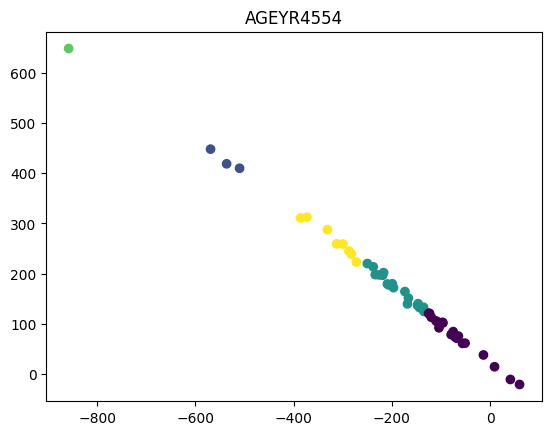

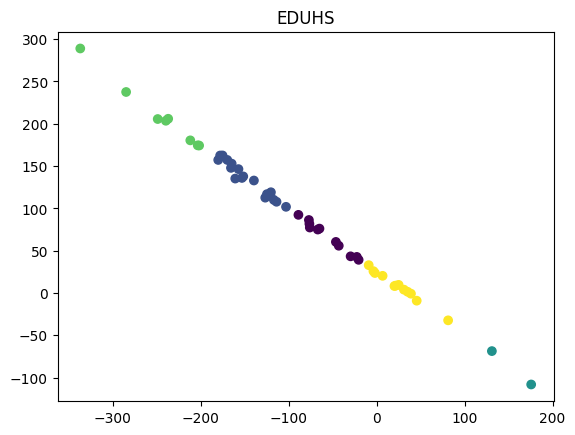

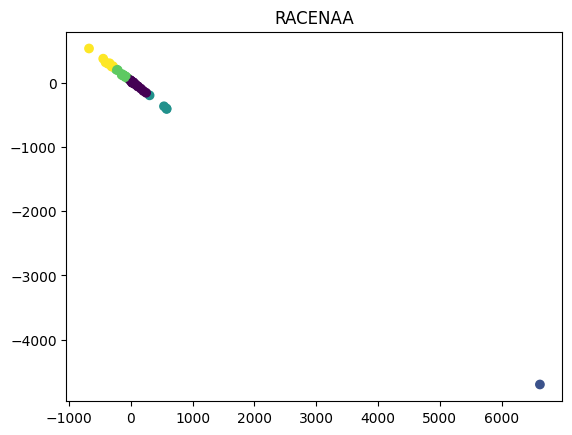

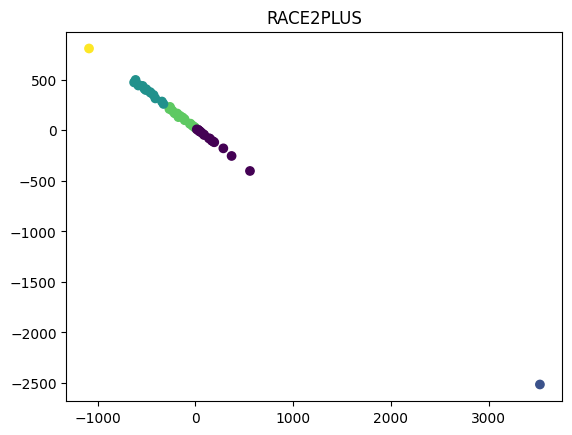

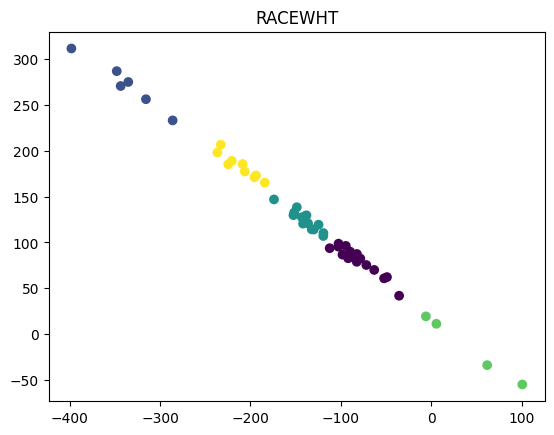

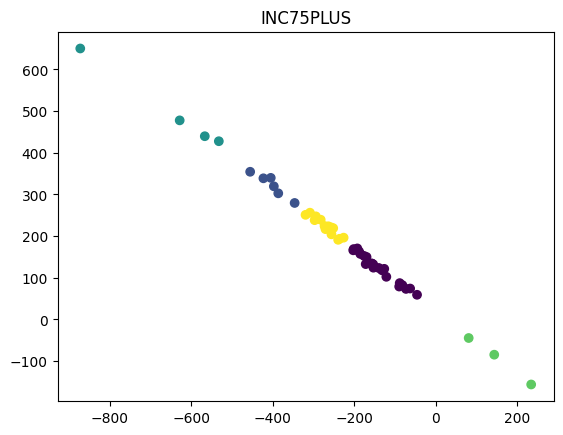

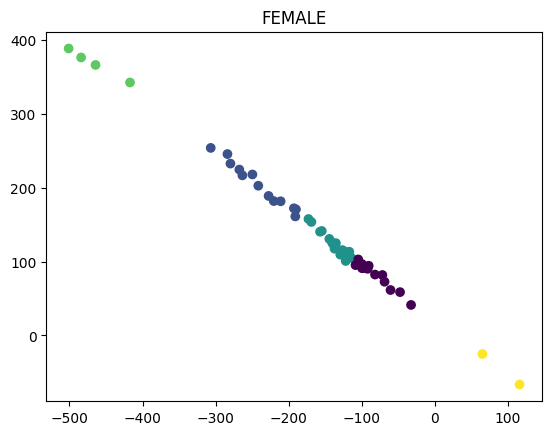

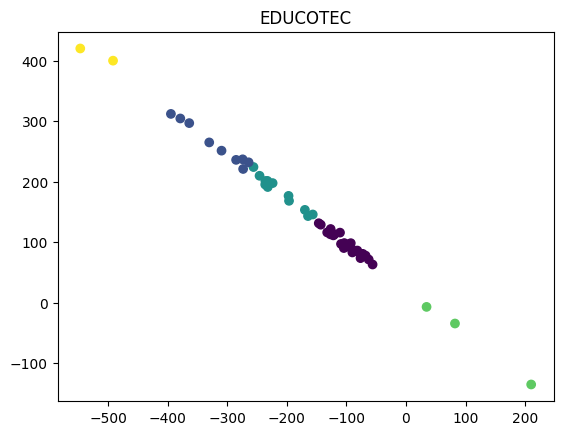

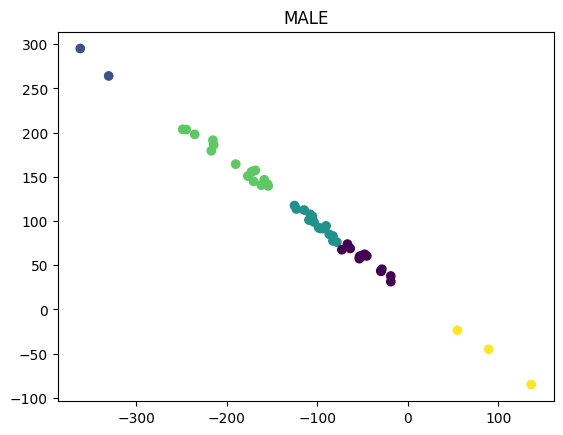

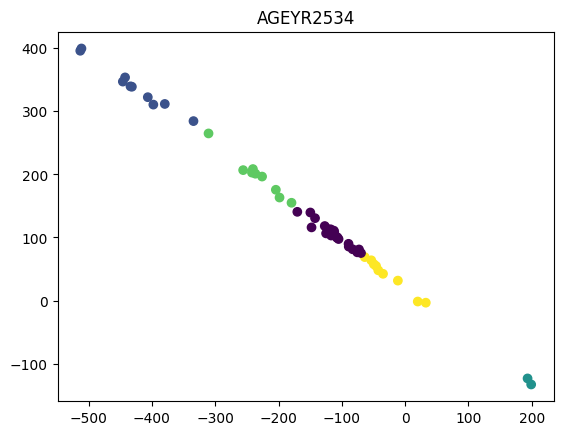

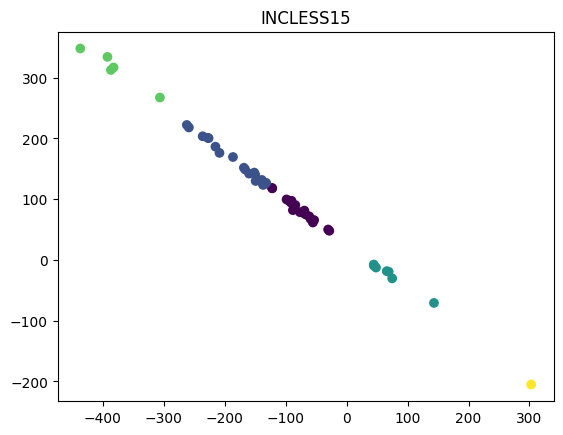

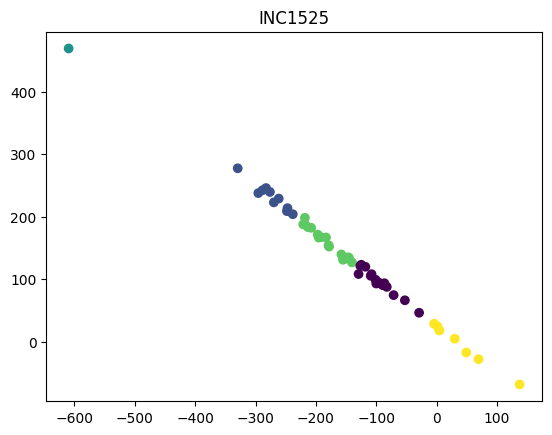

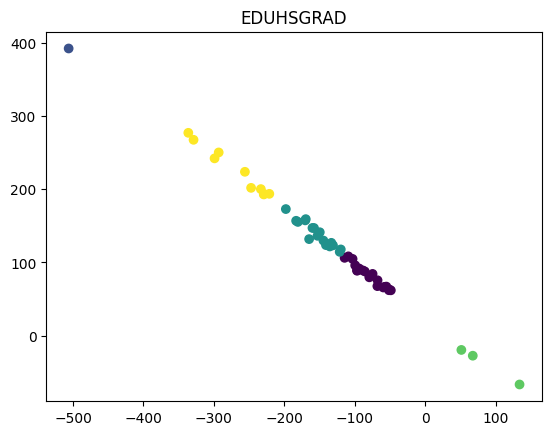

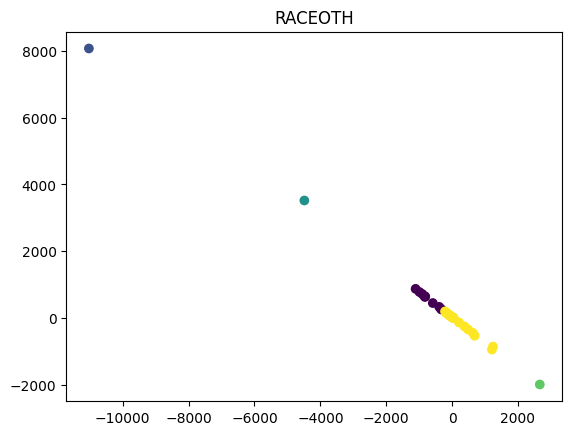

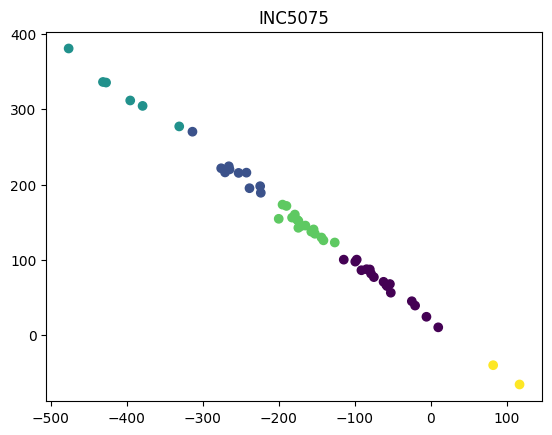

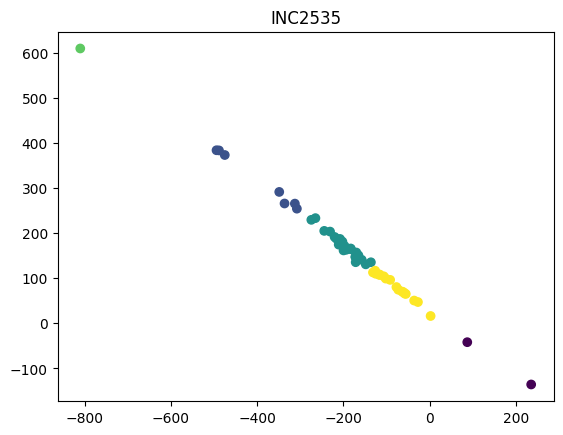

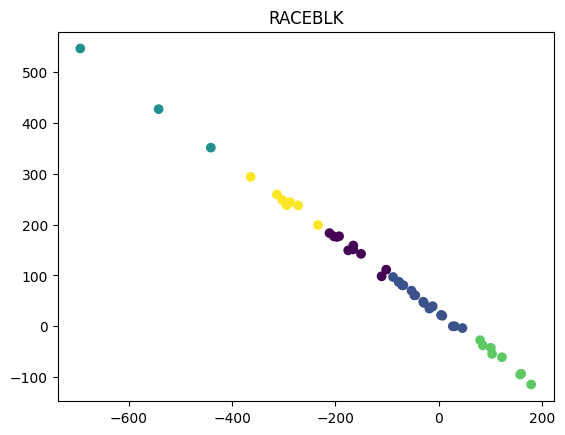

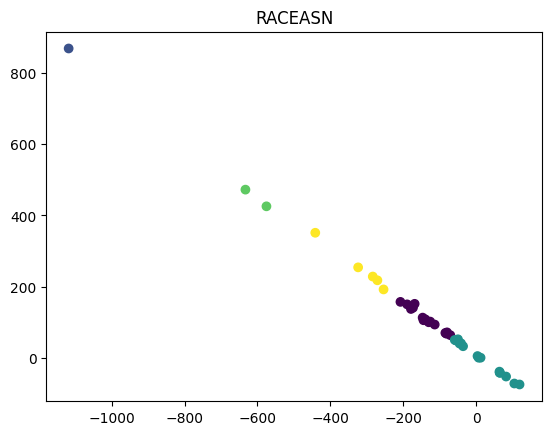

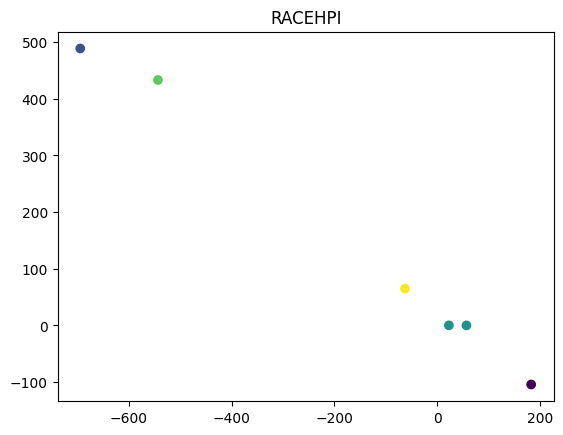

In [61]:
for id in data['StratificationID1'].unique():
    beta_0, beta_1 = [], []
    data_id = data[data['StratificationID1'] == id]
    for state in data_id["LocationDesc"].unique():
        if state == "National":
            continue
        # print(state)
        state_data = data_id[data_id["LocationDesc"] == state]
        x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)
        y = state_data['Data_Value']
        reg = LR().fit(x.values.reshape(-1, 1), y)
        beta_0.append(reg.intercept_)
        beta_1.append(reg.coef_[0])
        # print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
        # print()
    k_means = KMeans(n_clusters=5, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
    plt.scatter(beta_0, beta_1, c=k_means.labels_)
    plt.title(id)
    plt.show()